In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.plotly as py
import plotly.figure_factory as ff
from collections import Counter
import seaborn as sns
%matplotlib inline

### Removing the NaN

In [6]:
df_small = pd.read_csv("/Users/chandanramanna/Downloads/Cleansed.csv")
print("before remove NAN")
df_small.shape


before remove NAN


(5747135, 23)

In [25]:
list(df_small)

['Unnamed: 0',
 'ID',
 'Case Number',
 'Date',
 'Block',
 'IUCR',
 'Primary Type',
 'Description',
 'Location Description',
 'Arrest',
 'Domestic',
 'Beat',
 'District',
 'Ward',
 'Community Area',
 'FBI Code',
 'X Coordinate',
 'Y Coordinate',
 'Year',
 'Updated On',
 'Latitude',
 'Longitude',
 'Location']

In [7]:
df1 = df_small[:3]
df1

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,0,3065389,HJ783520,11/26/2003 05:30:00 AM,062XX S JUSTINE ST,0610,BURGLARY,FORCIBLE ENTRY,APARTMENT,False,...,16.0,67.0,05,1167071.0,1863359.0,2003,04/15/2016 08:55:02 AM,41.780614,-87.663033,"(41.780614126, -87.66303346)"
1,1,3065392,HJ783570,11/26/2003 04:30:00 PM,067XX S HONORE ST,0610,BURGLARY,FORCIBLE ENTRY,APARTMENT,False,...,15.0,67.0,05,1165179.0,1859961.0,2003,04/15/2016 08:55:02 AM,41.771330,-87.670066,"(41.771329829, -87.670065971)"
2,2,3065393,HJ785095,11/27/2003 09:00:00 AM,053XX W NORTH AVE,1320,CRIMINAL DAMAGE,TO VEHICLE,OTHER,False,...,37.0,25.0,14,1140231.0,1910112.0,2003,04/15/2016 08:55:02 AM,41.909443,-87.760292,"(41.909443141, -87.760291514)"


### Map

In [13]:
import folium
#colors = {'BURGLARY' : 'red', 'CRIMINAL DAMAGE' : 'blue'}

map_osm = folium.Map(location=[41.8781, -87.6298], zoom_start=11)
map_osm


In [15]:
# mark each station as a point
for index, row in df1.iterrows():
    folium.CircleMarker([row['Latitude'], row['Longitude']],
                        radius=15,
                        popup=row['Primary Type'],
                        fill_color="#3db7e4", # divvy color
                       ).add_to(map_osm)

In [22]:
# convert to (n, 2) nd-array format for heatmap
np.vectorize(df1["Latitude"])
np.vectorize(df1["Longitude"])
from folium import plugins
stationArr = df1[['Latitude', 'Longitude']].as_matrix()

# plot heatmap
map_osm.add_children(plugins.HeatMap(stationArr, radius=15))
map_osm

TypeError: only length-1 arrays can be converted to Python scalars

In [ ]:
# df1.apply(lambda row:folium.CircleMarker(location=[row["Latitude"], row["Longitude"]], 
#                                               radius=10, fill_color=[row['Primary Type']])
#                                              .add_to(map_osm), axis=1)

# map_osm

### Splitting the Date and Time

In [21]:
list(df1)

['Unnamed: 0',
 'ID',
 'Case Number',
 'Date',
 'Block',
 'IUCR',
 'Primary Type',
 'Description',
 'Location Description',
 'Arrest',
 'Domestic',
 'Beat',
 'District',
 'Ward',
 'Community Area',
 'FBI Code',
 'X Coordinate',
 'Y Coordinate',
 'Year',
 'Updated On',
 'Latitude',
 'Longitude',
 'Location']

In [34]:
print(df1["Date"].dtype)

object


In [35]:
df1["Date"].apply(pd.to_datetime, errors='ignore')

0   2003-11-26 05:30:00
1   2003-11-26 16:30:00
2   2003-11-27 09:00:00
Name: Date, dtype: datetime64[ns]

In [36]:
df1

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,0,3065389,HJ783520,11/26/2003 05:30:00 AM,062XX S JUSTINE ST,0610,BURGLARY,FORCIBLE ENTRY,APARTMENT,False,...,16.0,67.0,05,1167071.0,1863359.0,2003,04/15/2016 08:55:02 AM,41.780614,-87.663033,"(41.780614126, -87.66303346)"
1,1,3065392,HJ783570,11/26/2003 04:30:00 PM,067XX S HONORE ST,0610,BURGLARY,FORCIBLE ENTRY,APARTMENT,False,...,15.0,67.0,05,1165179.0,1859961.0,2003,04/15/2016 08:55:02 AM,41.771330,-87.670066,"(41.771329829, -87.670065971)"
2,2,3065393,HJ785095,11/27/2003 09:00:00 AM,053XX W NORTH AVE,1320,CRIMINAL DAMAGE,TO VEHICLE,OTHER,False,...,37.0,25.0,14,1140231.0,1910112.0,2003,04/15/2016 08:55:02 AM,41.909443,-87.760292,"(41.909443141, -87.760291514)"


In [40]:
temp = pd.DatetimeIndex(df1['Date'])
df1['Date'] = temp.date
df1['Time'] = temp.time
df1

/Users/chandanramanna/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/Users/chandanramanna/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,Time
0,0,3065389,HJ783520,2003-11-26,062XX S JUSTINE ST,0610,BURGLARY,FORCIBLE ENTRY,APARTMENT,False,...,67.0,05,1167071.0,1863359.0,2003,04/15/2016 08:55:02 AM,41.780614,-87.663033,"(41.780614126, -87.66303346)",05:30:00
1,1,3065392,HJ783570,2003-11-26,067XX S HONORE ST,0610,BURGLARY,FORCIBLE ENTRY,APARTMENT,False,...,67.0,05,1165179.0,1859961.0,2003,04/15/2016 08:55:02 AM,41.771330,-87.670066,"(41.771329829, -87.670065971)",16:30:00
2,2,3065393,HJ785095,2003-11-27,053XX W NORTH AVE,1320,CRIMINAL DAMAGE,TO VEHICLE,OTHER,False,...,25.0,14,1140231.0,1910112.0,2003,04/15/2016 08:55:02 AM,41.909443,-87.760292,"(41.909443141, -87.760291514)",09:00:00


In [41]:
list(df1)

['Unnamed: 0',
 'ID',
 'Case Number',
 'Date',
 'Block',
 'IUCR',
 'Primary Type',
 'Description',
 'Location Description',
 'Arrest',
 'Domestic',
 'Beat',
 'District',
 'Ward',
 'Community Area',
 'FBI Code',
 'X Coordinate',
 'Y Coordinate',
 'Year',
 'Updated On',
 'Latitude',
 'Longitude',
 'Location',
 'Time']

In [38]:
from datetime import datetime
data1["Date"] = df1["Date"].apply(lambda x: datetime.strptime(x,"%m/%d/%Y %H:%M:%S %f"))
df1

ValueError: time data '11/26/2003 05:30:00 AM' does not match format '%m/%d/%Y %H:%M:%S %f'

In [22]:

df1['new_date'] = df1['Date'].dt.date
df1['new_time'] = df1['Date'].dt.time

df1

AttributeError: Can only use .dt accessor with datetimelike values

### Creating Cleansed Data

In [44]:
# print("after remove NAN")
# df = df.dropna()
# df.shape
# df.to_csv("/Users/chandanramanna/Downloads/Cleansed.csv")

### Creating small dataset

In [45]:
df_small = df_small[:10000]
#df.to_csv("/Users/chandanramanna/Downloads/Cleansed_mini.csv")

### Extracting Primary Type and Year attribute

In [46]:
df_small.shape

(10000, 24)

In [66]:
df_PT_Year = df_small[['ID','Primary Type', 'Year']]
df_PT_Year

,ID,Primary Type,Year
0,3.065389e+06,BURGLARY,2003.0
1,3.065392e+06,BURGLARY,2003.0
2,3.065393e+06,CRIMINAL DAMAGE,2003.0
3,3.065394e+06,CRIMINAL DAMAGE,2003.0
4,3.065395e+06,THEFT,2003.0
5,3.065396e+06,CRIMINAL DAMAGE,2003.0
6,3.065397e+06,BATTERY,2003.0
7,3.065398e+06,CRIMINAL DAMAGE,2003.0
8,3.065399e+06,CRIMINAL TRESPASS,2003.0
9,3.065400e+06,MOTOR VEHICLE THEFT,2003.0


In [67]:
df_PT_Year.shape

(5747135, 3)

### Counting w.r.t Year

In [68]:
df_PT_Year["Year"].value_counts()

2003.0    471991
2004.0    467128
2005.0    449870
2006.0    445495
2007.0    435527
2008.0    419787
2009.0    385828
2010.0    368409
2011.0    350470
2002.0    345009
2012.0    334394
2013.0    304243
2014.0    269320
2015.0    259586
2016.0    250482
2017.0    185745
2001.0      3850
Name: Year, dtype: int64

In [69]:
df_PT_Year["Count"]=df_small.groupby("Year")["Year"].transform("count")
df_PT_Year

/Users/chandanramanna/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



,ID,Primary Type,Year,Count
0,3.065389e+06,BURGLARY,2003.0,471991.0
1,3.065392e+06,BURGLARY,2003.0,471991.0
2,3.065393e+06,CRIMINAL DAMAGE,2003.0,471991.0
3,3.065394e+06,CRIMINAL DAMAGE,2003.0,471991.0
4,3.065395e+06,THEFT,2003.0,471991.0
5,3.065396e+06,CRIMINAL DAMAGE,2003.0,471991.0
6,3.065397e+06,BATTERY,2003.0,471991.0
7,3.065398e+06,CRIMINAL DAMAGE,2003.0,471991.0
8,3.065399e+06,CRIMINAL TRESPASS,2003.0,471991.0
9,3.065400e+06,MOTOR VEHICLE THEFT,2003.0,471991.0


In [77]:
df2=df_PT_Year[["Year", "Count"]]
df2

,Year,Count
0,2003.0,471991.0
1,2003.0,471991.0
2,2003.0,471991.0
3,2003.0,471991.0
4,2003.0,471991.0
5,2003.0,471991.0
6,2003.0,471991.0
7,2003.0,471991.0
8,2003.0,471991.0
9,2003.0,471991.0


In [78]:
df3 = df2['Count'].groupby(df2['Year'])
df4=df3.mean()
df4

Year
2001.0      3850.0
2002.0    345009.0
2003.0    471991.0
2004.0    467128.0
2005.0    449870.0
2006.0    445495.0
2007.0    435527.0
2008.0    419787.0
2009.0    385828.0
2010.0    368409.0
2011.0    350470.0
2012.0    334394.0
2013.0    304243.0
2014.0    269320.0
2015.0    259586.0
2016.0    250482.0
2017.0    185745.0
Name: Count, dtype: float64

In [79]:
df5 = pd.DataFrame(df4)

In [80]:
df5 = df5.drop(df5.index[0])
df5

,Count
Year,
2002.0,345009.0
2003.0,471991.0
2004.0,467128.0
2005.0,449870.0
2006.0,445495.0
2007.0,435527.0
2008.0,419787.0
2009.0,385828.0
2010.0,368409.0


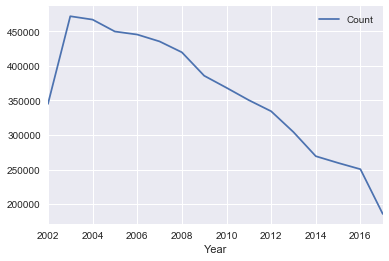

In [81]:
df5.plot()

### Counting w.r.t Primary Type

In [82]:
df_PT_Year["Primary Type"].value_counts()
df_PT_Year["Count_Crime"]=df_small.groupby("Primary Type")["Primary Type"].transform("count")
df_PT_Year

/Users/chandanramanna/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



,ID,Primary Type,Year,Count,Count_Crime
0,3.065389e+06,BURGLARY,2003.0,471991.0,339164.0
1,3.065392e+06,BURGLARY,2003.0,471991.0,339164.0
2,3.065393e+06,CRIMINAL DAMAGE,2003.0,471991.0,663575.0
3,3.065394e+06,CRIMINAL DAMAGE,2003.0,471991.0,663575.0
4,3.065395e+06,THEFT,2003.0,471991.0,1202667.0
5,3.065396e+06,CRIMINAL DAMAGE,2003.0,471991.0,663575.0
6,3.065397e+06,BATTERY,2003.0,471991.0,1049930.0
7,3.065398e+06,CRIMINAL DAMAGE,2003.0,471991.0,663575.0
8,3.065399e+06,CRIMINAL TRESPASS,2003.0,471991.0,167186.0
9,3.065400e+06,MOTOR VEHICLE THEFT,2003.0,471991.0,266280.0


In [83]:
df_PT=df_PT_Year[["Primary Type", "Count_Crime"]]
df_PT = df_PT['Count_Crime'].groupby(df_PT['Primary Type'])
df_PTT=df_PT.mean()
df_PTT

Primary Type
ARSON                                   9317.0
ASSAULT                               353327.0
BATTERY                              1049930.0
BURGLARY                              339164.0
CONCEALED CARRY LICENSE VIOLATION        129.0
CRIM SEXUAL ASSAULT                    21413.0
CRIMINAL DAMAGE                       663575.0
CRIMINAL TRESPASS                     167186.0
DECEPTIVE PRACTICE                    206569.0
GAMBLING                               12975.0
HOMICIDE                                8289.0
HUMAN TRAFFICKING                         25.0
INTERFERENCE WITH PUBLIC OFFICER       13150.0
INTIMIDATION                            3339.0
KIDNAPPING                              5249.0
LIQUOR LAW VIOLATION                   11641.0
MOTOR VEHICLE THEFT                   266280.0
NARCOTICS                             617829.0
NON - CRIMINAL                            38.0
NON-CRIMINAL                             101.0
NON-CRIMINAL (SUBJECT SPECIFIED)           6.0


In [84]:
dfnew = df_PT_Year.groupby(["Primary Type", "Count_Crime"]).first().reset_index()
dfnew_PT=dfnew[["Primary Type", "Count_Crime"]]
dfnew_PT


,Primary Type,Count_Crime
0,ARSON,9317.0
1,ASSAULT,353327.0
2,BATTERY,1049930.0
3,BURGLARY,339164.0
4,CONCEALED CARRY LICENSE VIOLATION,129.0
5,CRIM SEXUAL ASSAULT,21413.0
6,CRIMINAL DAMAGE,663575.0
7,CRIMINAL TRESPASS,167186.0
8,DECEPTIVE PRACTICE,206569.0
9,GAMBLING,12975.0


AttributeError: 'AxesSubplot' object has no attribute 'lablex'

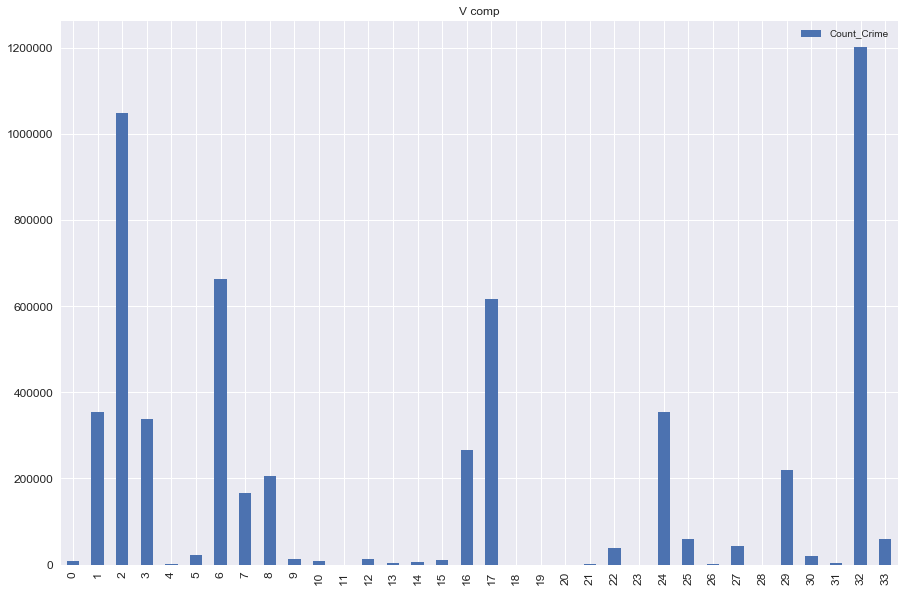

In [18]:
ax = dfnew_PT[['Primary Type','Count_Crime']].plot(kind='bar', title ="V comp", figsize=(15, 10), legend=True, fontsize=12)
ax.lablex(dfnew_PT["Primary Type"])
plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]),
 <a list of 34 Text xticklabel objects>)

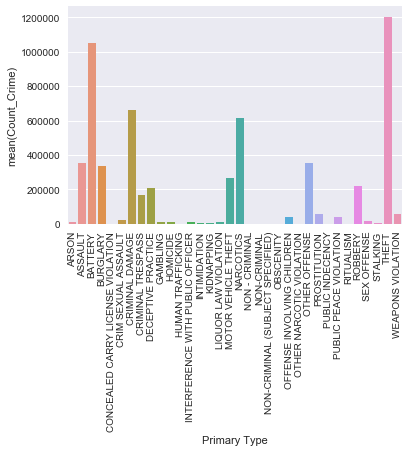

In [19]:
import seaborn as sns

sns.barplot(x='Primary Type', y='Count_Crime', data = dfnew_PT)
plt.xticks(rotation= 90)

In [20]:
dfnew_sort = dfnew_PT.sort_values(["Count_Crime"], ascending = False)
dfnew_sort

,Primary Type,Count_Crime
32,THEFT,1202667
2,BATTERY,1049930
6,CRIMINAL DAMAGE,663575
17,NARCOTICS,617829
24,OTHER OFFENSE,355280
1,ASSAULT,353327
3,BURGLARY,339164
16,MOTOR VEHICLE THEFT,266280
29,ROBBERY,218602
8,DECEPTIVE PRACTICE,206569


In [21]:
df_PT_Top10 = dfnew_sort[:10]
df_PT_Top10

,Primary Type,Count_Crime
32,THEFT,1202667
2,BATTERY,1049930
6,CRIMINAL DAMAGE,663575
17,NARCOTICS,617829
24,OTHER OFFENSE,355280
1,ASSAULT,353327
3,BURGLARY,339164
16,MOTOR VEHICLE THEFT,266280
29,ROBBERY,218602
8,DECEPTIVE PRACTICE,206569


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

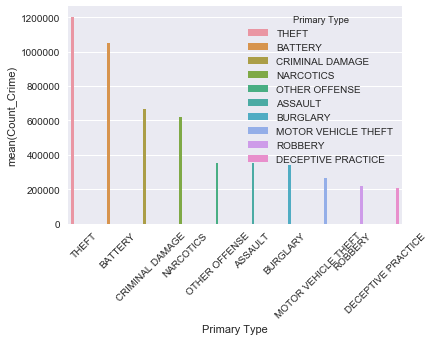

In [22]:
sns.barplot(x='Primary Type', y='Count_Crime', hue = "Primary Type", data = df_PT_Top10)
plt.xticks(rotation= 45)

### Donut Graph to represent the percentage of all the crime types.

In [23]:
dfnew_PT.shape

(34, 2)

In [24]:
import cufflinks as cf
cf.go_offline()
%matplotlib inline

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [65]:
dfnew_PT.iplot(kind='pie',labels=dfnew_PT['Count_Crime'],values=dfnew_PT['Primary Type'],pull=.2,hole=.2)

KeyError: '[  17  548 1710  564   33 1128  378  314   16   13   12    5   14   19  545\n 1253   50  653  109   63  341   23 2106   86] not in index'

In [66]:
from plotly import __version__

init_notebook_mode()
print("plotly version", __version__)

NameError: name 'init_notebook_mode' is not defined

### Merge the Similar Primary-Types. 

In [60]:
f = open("/Users/chandanramanna/Downloads/Cleansed.csv", "rb")
fo = open("/Users/chandanramanna/Downloads/Cleansed_New.csv", "wb")

In [61]:
for line in f:
    if (line[6] == "NON - CRIMINAL"):
        line[6] = "NON-CRIMINAL"
    if (line[6] == "OTHER NARCOTIC VIOLATION"):
        line[6] = "NARCOTICS"
    if (line[6] == "NON-CRIMINAL (SUBJECT SPECIFIED)"):
        line[6] = "NON-CRIMINAL"
    if (line[6] == "CRIM SEXUAL ASSAULT"):
        line[6] = "SEX OFFENSE"
    
    fo.write(line)

In [ ]:
df_small = pd.read_csv("/Users/chandanramanna/Downloads/Cleansed_New.csv")


### Reducing the data by considering the data since 2011